In [15]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import collections
import os

colors = sns.color_palette('Set2', 20)

alphas=[0.001, 0.0001, 0.00001]
sns.set_context('poster')
sns.set_style('white')
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
sns.set_palette('Paired', 20)

lgn_fontsize = plt.rcParams['legend.fontsize']

%matplotlib inline

In [2]:
backmapping_energies = collections.defaultdict(list)
fields = None
for f in sorted(filter(lambda x: x.endswith('xvg'), os.listdir('backmapping_energy/')), key=lambda x: int(x.split('_')[2].replace('.xvg', ''))):
    if not f.endswith('xvg'):
        continue
    alp = float(f.split('_')[1])
    print(alp, f)
    d = np.loadtxt(os.path.join('backmapping_energy/', f), skiprows=1)
    fields = {x: k for k, x in enumerate(open(os.path.join('backmapping_energy/', f), 'r').readline().split())}
    backmapping_energies[alp].append(d)

0.001 energy_0.001_1.xvg
0.0001 energy_0.0001_1.xvg
1e-05 energy_1e-05_1.xvg
0.0001 energy_0.0001_2.xvg
1e-05 energy_1e-05_2.xvg
0.001 energy_0.001_2.xvg
0.001 energy_0.001_3.xvg
0.0001 energy_0.0001_3.xvg
1e-05 energy_1e-05_3.xvg
0.001 energy_0.001_4.xvg
0.0001 energy_0.0001_4.xvg
1e-05 energy_1e-05_4.xvg


In [3]:
backmapping_energies.keys()

dict_keys([0.001, 0.0001, 1e-05])

# Backmapping

## Backmapping energy

In [4]:
pot_fields = [v for k, v in fields.items() if ('angle' in k or 'bond' in k or 'dih' in k or 'lj' in k or 'tab' in k) and not 'angle_253' in k]
angle_fields = [v for k, v in fields.items() if 'angle' in k and not 'angle_253' in k]
bond_fields = [v for k, v in fields.items() if 'bond' in k]
dih_fields = [v for k, v in fields.items() if 'dih' in k]
nonbond_fields = [v for k, v in fields.items() if 'lj' in k or 'tab' in k]
tot_pot_fields = angle_fields + bond_fields + dih_fields + nonbond_fields

In [5]:
total_bond_energy7 = {}
total_angle_energy7 = {}
total_dih_energy7 = {}
total_nonbond_energy7 = {}
total_pot_energy7 = {}
for alp in backmapping_energies.keys():
    ss = []
    s = backmapping_energies[alp]
    for s1 in s:
        sum_f = np.sum(s1[:, bond_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_bond_energy7[alp] = np.array(ss)
    
    ss = []
    for s1 in s:
        sum_f = np.sum(s1[:, angle_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_angle_energy7[alp] = np.array(ss)
    
    ss = []
    for s1 in s:
        sum_f = np.sum(s1[:, dih_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_dih_energy7[alp] = np.array(ss)
    
    ss = []
    for s1 in s:
        sum_f = np.sum(s1[:, nonbond_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_nonbond_energy7[alp] = np.array(ss)
    
    ss = []
    for s1 in s:
        sum_f = np.sum(s1[:, tot_pot_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_pot_energy7[alp] = np.array(ss)

In [6]:
plt.rcParams['figure.figsize'] = (16, 4)
ymin, ymax, ystep = 30000, 175000, 50000
multiply = 10**4
for i, alp in enumerate(sorted(backmapping_energies.keys(), reverse=True), 1):
    plt.subplot(1,3,i)
    for j, s in enumerate(total_pot_energy7[alp]):
        l, = plt.plot(s[:, 0], s[:, 1]/multiply, 'k.')
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.66, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    plt.axvline(x=5, linewidth=2.0, linestyle='--', color='k')
    plt.axvline(x=5+(1.0/alp/1000), linewidth=2.0, linestyle='-', color='k')
    plt.ylim([ymin/multiply, ymax/multiply])
    yticks = np.arange(ymin/multiply, ymax/multiply, ystep/multiply)
    if i == 1:
        plt.ylabel('kJ/mol')
        plt.annotate(r'$\times 10^4$'.format(multiply), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
        plt.yticks(yticks, yticks)
    else:        
        plt.yticks(yticks, [])
    plt.xlabel('simulation time (ps)')
plt.tight_layout()
plt.savefig('pete_aa_potential_bck.pdf', dpi=200, bbox_inches='tight')

# Equilibration

In [7]:
gmx_pot_energy = collections.defaultdict(list)
for f in sorted(os.listdir('eq_energy/')):
    if f.endswith('xvg'):
        print(f)
        alpha = float(f.split('_')[1])
        d = np.loadtxt(os.path.join('eq_energy', f), comments=('@', '#'))
        gmx_pot_energy[alpha].append(d)

energy_0.00001_s1.xvg
energy_0.00001_s2.xvg
energy_0.00001_s3.xvg
energy_0.00001_s4.xvg
energy_0.0001_s1.xvg
energy_0.0001_s2.xvg
energy_0.0001_s3.xvg
energy_0.0001_s4.xvg
energy_0.001_s1.xvg
energy_0.001_s2.xvg
energy_0.001_s3.xvg
energy_0.001_s4.xvg


In [8]:
eq_header = {
    'time': 0,
    "bond": 1,
    "angle": 2,
    "propdih": 3,
    "rb_dih": 4,
    "lj-14": 5,
    "coulomb-14": 6,
    "lj": 7, 
    "coulomb": 8,
    "potential": 10
}

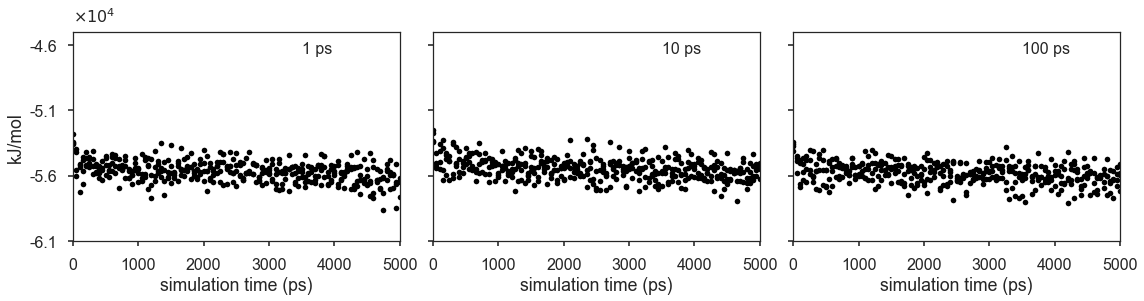

In [16]:
plt.rcParams['figure.figsize'] = (16, 4)
pot = 'potential'
ymin, ymax, ystep = -61000, -45000, 5000
multiply = 10**4
extra_artist = []
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,3,i)
    for s in l:
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/multiply, 'k.', markevery=50)
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2f} \; kJ/mol$'.format(pot, np.average(avg_pot)), 
    #             fontsize=lgn_fontsize,  xy=(0.05, 0.02), xycoords='axes fraction')
    plt.ylim([ymin/multiply, ymax/multiply])
    yticks = np.arange(ymin/multiply, ymax/multiply, ystep/multiply)
    plt.yticks(yticks)
    plt.xlim([0, 5000])
    if i == 1:
        plt.yticks(yticks, yticks)
        plt.ylabel(r'kJ/mol'.format(pot))
        e = plt.annotate(
                r'$\times 10^4$'.format(multiply),
                xy=(0, 1.05),
                xycoords='axes fraction',
                fontsize=lgn_fontsize)
        extra_artist.append(e)
    else:
        plt.yticks(yticks, [])
    plt.xlabel('simulation time (ps)')        
   
plt.tight_layout()
plt.savefig('pete_aa_eq_potential.pdf', dpi=200, bbox_extra_artists=extra_artist, bbox_inches='tight')

In [17]:
RT = 0.0083144621 * 298.0

0.001 0.626294389738 0.000277140915075 0.000728835349418
0.0001 0.626169746881 8.85617874669e-05 0.000221740180771
1e-05 0.626256934112 0.000220186656032 0.000581775308489


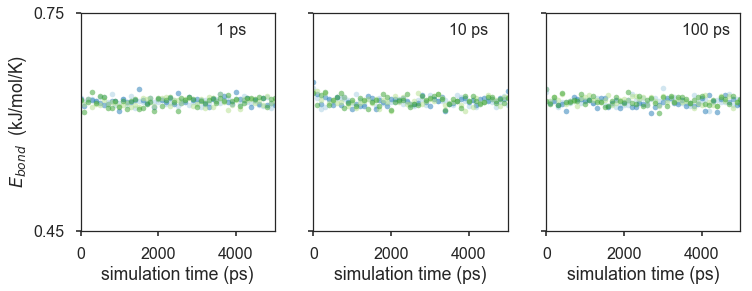

In [18]:
plt.rcParams['figure.figsize'] = (16, 4)
pot = 'bond'
ymin, ymax, ystep = 30000, 50000, 20000
m = 27000*RT
extra_artist = []
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,4,i)
    e_vals = []
    for s in l:
        e_vals.append(np.average(s[:, eq_header[pot]]))
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/m, '.', markevery=100, alpha=0.5)
    print(alp, np.average(e_vals)/m, np.std(e_vals)/m, (np.max(e_vals)-np.min(e_vals))/m)
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2f} \; kJ/mol$'.format(pot, np.average(avg_pot)), 
    #             fontsize=lgn_fontsize,  xy=(0.05, 0.02), xycoords='axes fraction')
    plt.ylim([ymin/m, ymax/m])
    yticks = np.arange(ymin/m, ymax/m, ystep/m)
    if i == 1:
        plt.ylabel(r'$E_{{{}}}$  (kJ/mol/K)'.format(pot))
        #plt.annotate(r'$\times 10^4$'.format(m), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
        plt.yticks(yticks, map('{:.2f}'.format, yticks))
    else:        
        plt.yticks(yticks, [])
    plt.xlim([0, 5000])
    plt.xlabel('simulation time (ps)')        
plt.show()
plt.tight_layout()
plt.savefig('pete_aa_eq_{}.pdf'.format(pot), dpi=200, bbox_extra_artists=extra_artist, bbox_inches='tight')

0.001 0.366841896227 0.000306878249183 0.0008066360606
0.0001 0.366913820727 0.000201200499368 0.000569045852304
1e-05 0.366622867441 0.000263293392892 0.000743734353106


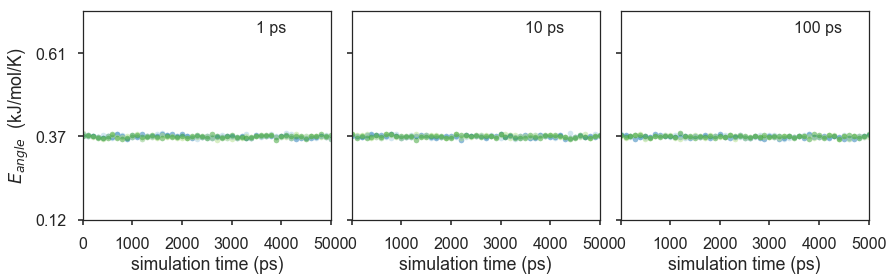

In [19]:
plt.rcParams['figure.figsize'] = (16, 4)
pot = 'angle'
ymin, ymax, ystep = 10000, 60000, 20000
m = 32972*RT
extra_artist = []
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,4,i)
    e_vals = []
    for s in l:
        e_vals.append(np.average(s[:, eq_header[pot]]))
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/m, '.', markevery=100, alpha=0.5)
    print(alp, np.average(e_vals)/m, np.std(e_vals)/m, (np.max(e_vals)-np.min(e_vals))/m)
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2f} \; kJ/mol$'.format(pot, np.average(avg_pot)), 
    #             fontsize=lgn_fontsize,  xy=(0.05, 0.02), xycoords='axes fraction')
    plt.ylim([ymin/m, ymax/m])
    yticks = np.arange(ymin/m, ymax/m, ystep/m)
    if i == 1:
        plt.ylabel(r'$E_{{{}}}$  (kJ/mol/K)'.format(pot))
        #plt.annotate(r'$\times 10^4$'.format(m), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
        plt.yticks(yticks, map('{:.2f}'.format, yticks))
    else:        
        plt.yticks(yticks, [])
    plt.xlim([0, 5000])
    plt.xlabel('simulation time (ps)')     
   
plt.tight_layout()
plt.savefig('pete_aa_eq_{}.pdf'.format(pot), dpi=200, bbox_extra_artists=extra_artist, bbox_inches='tight')

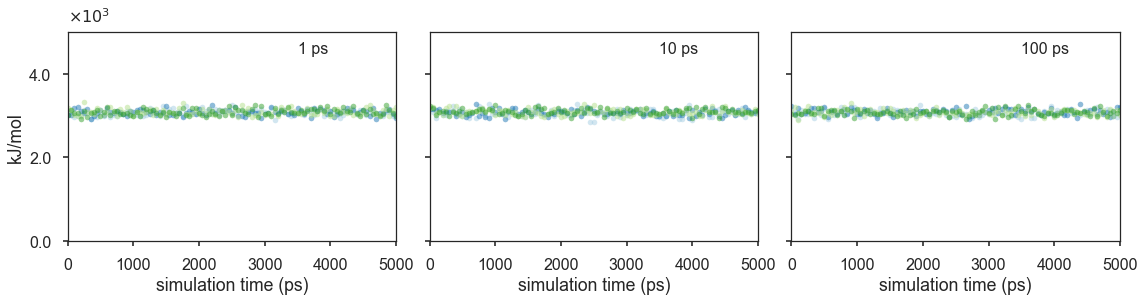

In [20]:
plt.rcParams['figure.figsize'] = (16, 4)
pot = 'propdih'
ymin, ymax, ystep = 0, 5000, 2000
multiply = 10**3
extra_artist = []
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,3,i)
    for s in l:
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/multiply, '.', markevery=50, alpha=0.5)
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2f} \; kJ/mol$'.format(pot, np.average(avg_pot)), 
    #             fontsize=lgn_fontsize,  xy=(0.05, 0.02), xycoords='axes fraction')
    plt.ylim([ymin/multiply, ymax/multiply])
    yticks = np.arange(ymin/multiply, ymax/multiply, ystep/multiply)
    plt.yticks(yticks)
    plt.xlim([0, 5000])
    if i == 1:
        plt.yticks(yticks, yticks)
        plt.ylabel(r'kJ/mol'.format(pot))
        e = plt.annotate(
                r'$\times 10^3$'.format(multiply),
                xy=(0, 1.05),
                xycoords='axes fraction',
                fontsize=lgn_fontsize)
        extra_artist.append(e)
    else:
        plt.yticks(yticks, [])
    plt.xlabel('simulation time (ps)')        
   
plt.tight_layout()
plt.savefig('pete_aa_eq_{}.pdf'.format(pot), dpi=200, bbox_extra_artists=extra_artist, bbox_inches='tight')

0.001 0.150843846735 0.00131063186515 0.00369078789798
0.0001 0.150534000865 0.00046137403435 0.00128227269835
1e-05 0.149725049602 0.000814763730979 0.00212203084554


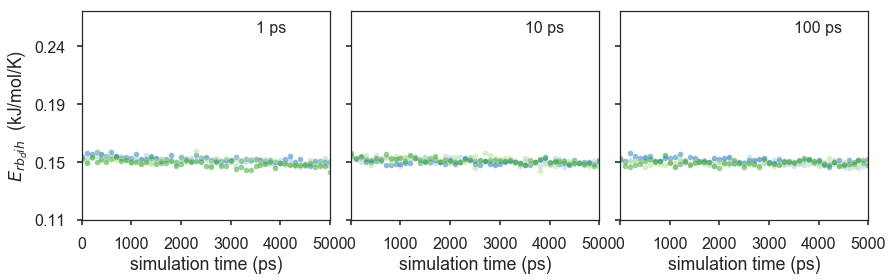

In [21]:
plt.rcParams['figure.figsize'] = (16, 4)
pot = 'rb_dih'
ymin, ymax, ystep = 12000, 30000, 5000
m = 45748*RT
extra_artist = []
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,4,i)
    e_vals = []
    for s in l:
        e_vals.append(np.average(s[:, eq_header[pot]]))
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/m, '.', markevery=100, alpha=0.5)
    print(alp, np.average(e_vals)/m, np.std(e_vals)/m, (np.max(e_vals)-np.min(e_vals))/m)
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2f} \; kJ/mol$'.format(pot, np.average(avg_pot)), 
    #             fontsize=lgn_fontsize,  xy=(0.05, 0.02), xycoords='axes fraction')
    plt.ylim([ymin/m, ymax/m])
    yticks = np.arange(ymin/m, ymax/m, ystep/m)
    if i == 1:
        plt.ylabel(r'$E_{{{}}}$  (kJ/mol/K)'.format(pot))
        #plt.annotate(r'$\times 10^4$'.format(m), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
        plt.yticks(yticks, map('{:.2f}'.format, yticks))
    else:        
        plt.yticks(yticks, [])
    plt.xlim([0, 5000])
    plt.xlabel('simulation time (ps)')       
   
plt.tight_layout()
plt.savefig('pete_aa_eq_{}.pdf'.format(pot), dpi=200, bbox_extra_artists=extra_artist, bbox_inches='tight')

# RDF

In [22]:
rdfs = collections.defaultdict(dict) # at_name: alpha: rdfs
for f in sorted(os.listdir('rdf')):
    if f.endswith('xvg') and f.startswith('rdf'):
        t = f.split('_')
        at_name = '_'.join(t[3:]).replace('.xvg', '')
        d = np.loadtxt(os.path.join('rdf', f), comments=('@', '#'))
        alpha = float(t[2])
        if alpha not in rdfs[at_name]:
            rdfs[at_name][alpha] = []
        rdfs[at_name][alpha].append(d)


In [23]:
avg_rdfs = collections.defaultdict(dict)
for at_name in rdfs:
    for i, (alpha, l) in enumerate(sorted(rdfs[at_name].items(), reverse=True), 1):
        avg_l = np.average(l, axis=0)
        std_l = np.std(l, axis=0)
        s = np.zeros((avg_l.shape[0], avg_l.shape[1]+1))
        s[:, (0, 1)] = avg_l
        s[:, 2] = std_l[:, 1]
        avg_rdfs[at_name][alpha] = s

1e-05 0.0001 0.00591417788031
1e-05 0.001 0.00665216130292
0.0001 0.001 0.00659475170116
0.0063870302948


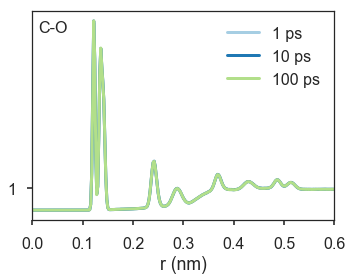

In [45]:
plt.rcParams['figure.figsize'] = (5, 4)
at_name = 'C_O'
for alp, d in sorted(avg_rdfs[at_name].items(), reverse=True):
    plt.plot(d[:, 0], d[:, 1], label='{:.0f} ps'.format(1.0/alp/1000), linewidth=3)
    plt.xlim([0, 0.6])
plt.legend(loc=0)
alps = sorted(avg_rdfs[at_name].keys())
rmses = []
for a1 in range(len(alps)):
    d1 = avg_rdfs[at_name][alps[a1]]
    for a2 in range(a1+1, len(alps)):
        d2 = avg_rdfs[at_name][alps[a2]]
        rmse = np.sqrt(np.average(pow(d2[:, 1]-d1[:, 1], 2)))
        rmses.append(rmse)
        print(alps[a1], alps[a2], rmse)
print(np.average(rmses))
#plt.xlim([0, 0.2])
plt.annotate(at_name.replace('_', '-'), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.yticks([1])
plt.tight_layout()
plt.savefig('pete_rdf_c_o.pdf', dpi=200, bbox_inches='tight')

1e-05 0.0001 0.00238000787814
1e-05 0.001 0.00252518563674
0.0001 0.001 0.00228817612958
0.00239778988149


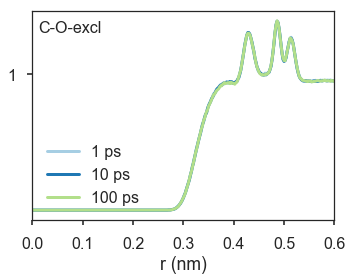

In [44]:
plt.rcParams['figure.figsize'] = (5, 4)
at_name = 'C_O_excl'
for alp, d in sorted(avg_rdfs[at_name].items(), reverse=True):
    plt.plot(d[:, 0], d[:, 1], label='{:.0f} ps'.format(1.0/alp/1000), linewidth=3)
    plt.xlim([0, 0.6])
plt.legend(loc=3)
alps = sorted(avg_rdfs[at_name].keys())
rmses = []
for a1 in range(len(alps)):
    d1 = avg_rdfs[at_name][alps[a1]]
    for a2 in range(a1+1, len(alps)):
        d2 = avg_rdfs[at_name][alps[a2]]
        rmse = np.sqrt(np.average(pow(d2[:, 1]-d1[:, 1], 2)))
        rmses.append(rmse)
        print(alps[a1], alps[a2], rmse)
print(np.average(rmses))
plt.annotate(at_name.replace('_', '-'), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.yticks([1])
plt.tight_layout()
plt.savefig('pete_rdf_{}.pdf'.format(at_name), dpi=200, bbox_inches='tight')

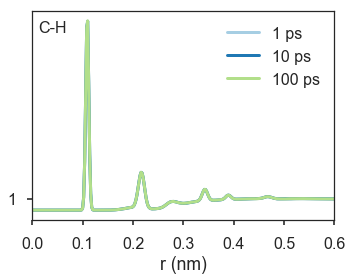

In [43]:
plt.rcParams['figure.figsize'] = (5, 4)
at_name = 'C_H'
for alp, d in sorted(avg_rdfs[at_name].items(), reverse=True):
    plt.plot(d[:, 0], d[:, 1], label='{:0.0f} ps'.format(1.0/alp/1000), linewidth=3)
    plt.xlim([0, 0.6])
plt.legend(loc=0)
plt.annotate(at_name.replace('_', '-'), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.yticks([1])
plt.tight_layout()
plt.savefig('pete_rdf_c_h.pdf', dpi=200, bbox_inches='tight')

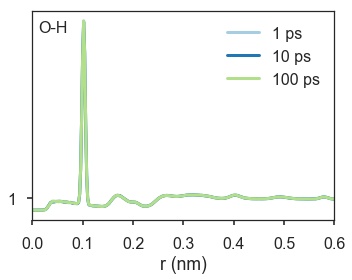

In [42]:
plt.rcParams['figure.figsize'] = (5, 4)
at_name = 'O_H'
for alp, d in sorted(avg_rdfs[at_name].items(), reverse=True):
    plt.plot(d[:, 0], d[:, 1], label='{:0.0f} ps'.format(1.0/alp/1000), linewidth=3)
    plt.xlim([0, 0.6])
plt.legend(loc=0)
plt.annotate(at_name.replace('_', '-'), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.yticks([1])
plt.tight_layout()
plt.savefig('pete_rdf_o_h.pdf', dpi=200, bbox_inches='tight')

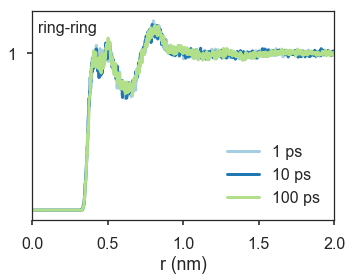

In [41]:
plt.rcParams['figure.figsize'] = (5, 4)
at_name = 'ring_ring'
for alp, d in sorted(avg_rdfs[at_name].items(), reverse=True):
    plt.plot(d[:, 0], d[:, 1], label='{:0.0f} ps'.format(1.0/alp/1000), linewidth=3)
    plt.xlim([0, 2])
plt.legend(loc=0)
plt.annotate(at_name.replace('_', '-'), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.yticks([1])
plt.tight_layout()
plt.savefig('pete_rdf_ring_ring.pdf', dpi=200, bbox_inches='tight')

# H-bonds

In [2]:
hbonds = collections.defaultdict(list)
for f in sorted(os.listdir('hbond/'), key=lambda x: int(x.split('_')[1].replace('s', '')) if x.endswith('xvg') else -1):
    if f.endswith('xvg'):
        alpha = float(f.split('_')[2].replace('.xvg', ''))
        d = np.loadtxt(os.path.join('hbond', f), comments=('@', '#'))
        hbonds[alpha].append(d)
        print f, d.shape

hbond_s1_0.00001.xvg (251, 3)
hbond_s1_0.001.xvg (251, 3)
hbond_s1_0.0001.xvg (251, 3)
hbond_s2_0.0001.xvg (251, 3)
hbond_s2_0.00001.xvg (251, 3)
hbond_s2_0.001.xvg (251, 3)
hbond_s3_0.0001.xvg (251, 3)
hbond_s3_0.00001.xvg (251, 3)
hbond_s3_0.001.xvg (251, 3)
hbond_s4_0.00001.xvg (251, 3)
hbond_s4_0.0001.xvg (251, 3)
hbond_s4_0.001.xvg (251, 3)


(0.001, 1541.5089641434263, 49.822402912693107)
(0.0001, 1554.7858565737051, 55.156396247175586)
(1e-05, 1540.9591633466136, 39.80762161624633)


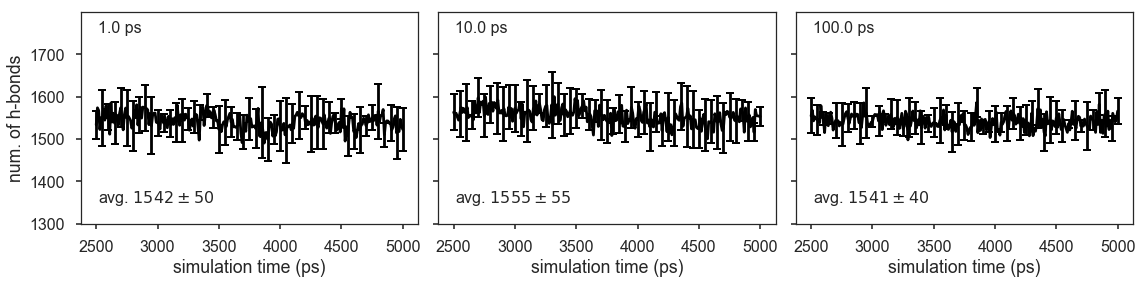

In [22]:
plt.rcParams['figure.figsize'] = (16, 4)
ylim = [1300, 1800]
for i, (alp, l) in enumerate(sorted(hbonds.items(), reverse=True), 1):
    plt.subplot(1,3,i)
#     for j, s in enumerate(l):
#         k, = plt.plot(s[:, 0], s[:, 2], marker='.',  color='k', 
#                 linestyle='None',  
#                 markerfacecolor='None', 
#                 markeredgewidth=1.0, markevery=10)
    avg_val = np.average(np.array(l), axis=0)
    std_val = np.std(np.array(l), axis=0)
    plt.errorbar(avg_val[:, 0], avg_val[:, 2], std_val[:, 2], color='k', errorevery=5, capthick=2.0, capsize=4.0)
    avg_val = np.average(np.array(l)[:, :, 2])
    std_val = np.std(np.array(l)[:, :, 2])
    print(alp, avg_val, std_val)
    plt.annotate(
        r'avg. ${:.0f} \pm {:.0f}$'.format(avg_val, std_val), 
        xy=(0.05, 0.1), 
        xycoords='axes fraction',
        fontsize=lgn_fontsize)
    plt.annotate('{} ps'.format(0.001/alp), xy=(0.05, 0.90), xycoords='axes fraction', fontsize=lgn_fontsize)
    plt.xlabel('simulation time (ps)')     
    plt.ylim(ylim)
    #plt.xlim([2500, 5000])
    if i == 1:
        plt.ylabel('num. of h-bonds')
        plt.yticks(range(ylim[0], ylim[1], 100))
    else:
        plt.yticks(range(ylim[0], ylim[1], 100), [])
plt.tight_layout()
plt.savefig('pete_aa_num_hbonds.pdf', dpi=200, bbox_inches='tight')